In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from watermark import watermark

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# ML specific imports
import xgboost as XGB

import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [3]:
print(watermark(packages="numpy,pandas,xgboost,sklearn"))

numpy  : 1.21.5
pandas : 1.4.3
xgboost: 1.7.3
sklearn: 1.2.1



In [4]:
df_rnd_train = pd.read_parquet('../datasets/df_rnd_train.parquet')
df_rnd_test = pd.read_parquet('../datasets/df_rnd_test.parquet')
df_rnd_val = pd.read_parquet('../datasets/df_rnd_val.parquet')

In [5]:
df_rnd_train.describe()

,ABI_C07,ABI_C09,ABI_C13,GLM,MRMS_REFC
count,3.400998e+07,3.400998e+07,3.400998e+07,3.400998e+07,3.400998e+07
mean,2.361161e+02,1.269867e+02,1.653654e+02,8.859018e-01,1.768619e+01
std,2.526862e+01,9.009901e+01,6.469377e+01,4.329247e+00,1.060643e+01
min,1.973053e+02,1.857928e+02,1.857274e+02,0.000000e+00,-1.100000e+01
25%,2.462160e+02,2.132695e+02,2.144605e+02,0.000000e+00,1.205556e+01
50%,2.538741e+02,2.218346e+02,2.247749e+02,0.000000e+00,1.833333e+01
75%,2.636845e+02,2.344709e+02,2.446439e+02,7.407407e-02,2.658333e+01
max,3.256761e+02,2.626577e+02,3.124393e+02,7.032593e+02,7.266666e+01


In [6]:
train_col = ['ABI_C07', 'ABI_C09', 'ABI_C13', 'GLM']
test_col =['MRMS_REFC']

In [7]:
X_train = df_rnd_train[train_col]
y_train = df_rnd_train[test_col]

X_test = df_rnd_test[train_col]
y_test = df_rnd_test[test_col]

# XGBoost

In [8]:
XGBr = XGB.XGBRegressor(eval_metric='rmse')

XGBr.fit(
    X_train.values, 
    y_train)

xgb_y_pred = XGBr.predict(X_test.values)

In [9]:
mean_squared_error(y_test.values, xgb_y_pred.ravel())

75.934044

(-5.0, 55.0)

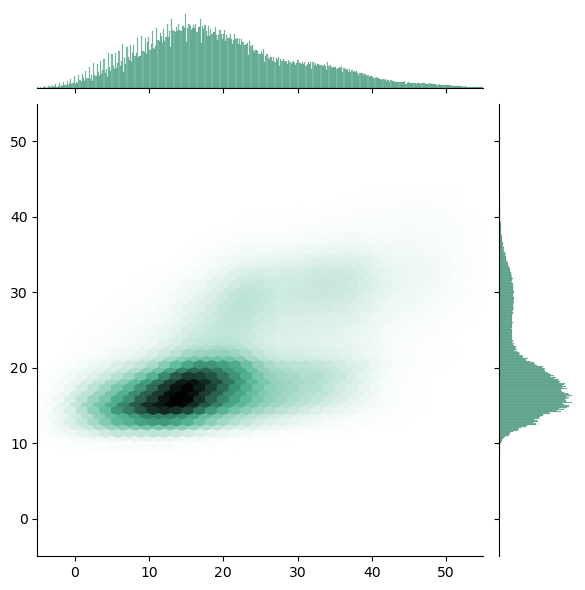

In [11]:
sns.jointplot(x=y_test.values.ravel(), y=xgb_y_pred.ravel(), kind="hex", color="#4CB391")

plt.xlim([-5,55])
plt.ylim([-5,55])


# KNN Regression

In [12]:
KNNr = KNeighborsRegressor(n_neighbors=11)

KNNr.fit(
    X_train.values, 
    y_train)

knn_y_pred = KNNr.predict(X_test.values)

In [13]:
mean_squared_error(y_test.values, knn_y_pred.ravel())

83.32766

(-5.0, 55.0)

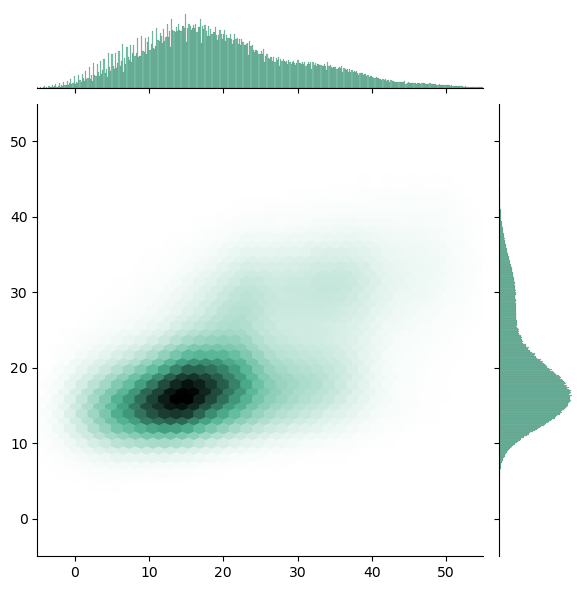

In [14]:


sns.jointplot(
    x=y_test.values.ravel(), 
    y=knn_y_pred.ravel(), 
    kind="hex", 
    color="#4CB391")

plt.xlim([-5,55])
plt.ylim([-5,55])


# Linear Regression

In [15]:
LR = LinearRegression()

In [16]:
LR.fit(
    X_train.values, 
    y_train)

LR_y_pred = LR.predict(X_test.values)

In [17]:
mean_squared_error(y_test.values, LR_y_pred.ravel())

98.138954

(-5.0, 60.0)

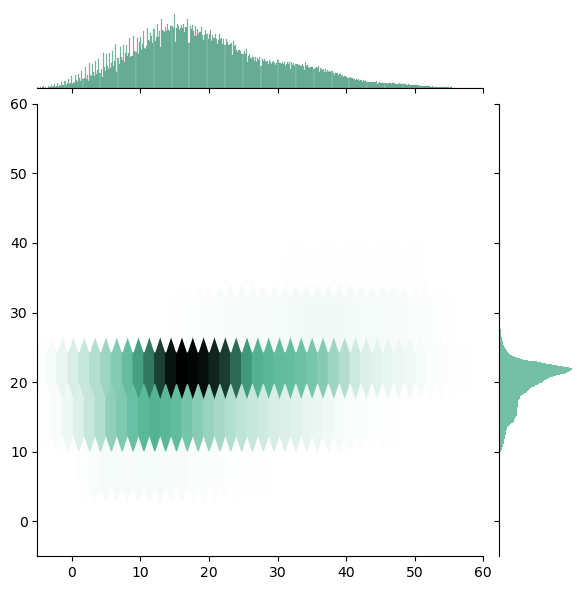

In [18]:
sns.jointplot(
    x=y_test.values.ravel(), 
    y=LR_y_pred.ravel(), 
    kind="hex", 
    color="#4CB391")


plt.xlim([-5,60])
plt.ylim([-5,60])